# **Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023**

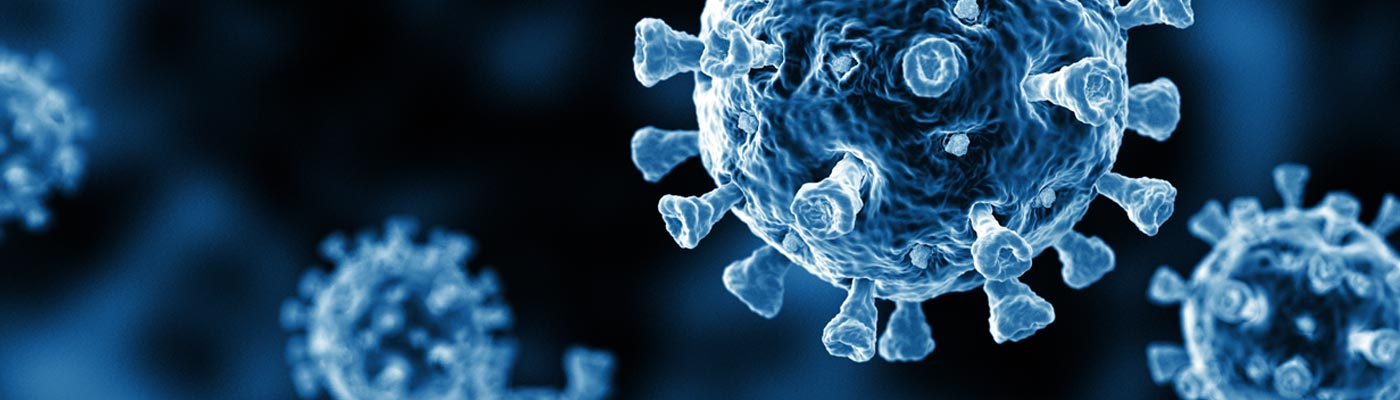

## **ABOUT THE DATA**
This dataset provides insights into the health conditions and contributing causes associated with deaths involving COVID-19 from 2020 to 2023, segmented by age group and state.
# New Section

In [61]:
#importing libraries needed for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [62]:
df=pd.read_csv('/content/drive/MyDrive/Data Sets/Project4/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')

In [63]:
df.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


Before diving into data analysis, it is essential to ensure the dataset is accurate, consistent, and free of errors. This data cleaning process involves several critical steps:

Handling Missing Values: Identify and address missing data through imputation, removal, or substitution based on the context.
Removing Duplicates: Detect and eliminate duplicate records to ensure data integrity.
Standardizing Formats: Ensure uniformity in data formats (e.g., dates, numerical values, categories) to facilitate seamless analysis.
Outlier Detection and Treatment: Identify outliers that may skew the results and decide on appropriate actions (e.g., removal, adjustment).
Correcting Inconsistencies: Resolve inconsistencies in data entries to maintain a coherent dataset.
Data Transformation: Apply necessary transformations to prepare the data for analysis (e.g., normalization, scaling).
By meticulously cleaning the data, we enhance its quality and reliability, laying a solid foundation for robust and insightful analysis

In [64]:
df.isnull().sum()

Start Date                 0
End Date                   0
Group                      0
Year                   12420
Month                  62100
State                      0
Condition Group            0
Condition                  0
ICD10_codes                0
Age Group                  0
COVID-19 Deaths       183449
Number of Mentions    177577
Flag                  437551
dtype: int64

In [65]:
df.drop(columns=['Year','Month'], inplace=True)

In [66]:
df.head()

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/1/2020,9/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,1/1/2020,9/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,1/1/2020,9/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,1/1/2020,9/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,1/1/2020,9/23/2023,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Start Date          621000 non-null  object 
 1   End Date            621000 non-null  object 
 2   Group               621000 non-null  object 
 3   State               621000 non-null  object 
 4   Condition Group     621000 non-null  object 
 5   Condition           621000 non-null  object 
 6   ICD10_codes         621000 non-null  object 
 7   Age Group           621000 non-null  object 
 8   COVID-19 Deaths     437551 non-null  float64
 9   Number of Mentions  443423 non-null  float64
 10  Flag                183449 non-null  object 
dtypes: float64(2), object(9)
memory usage: 52.1+ MB


In [68]:
df['Start Date']=pd.to_datetime(df['Start Date'])
df['End Date']=pd.to_datetime(df['End Date'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start Date          621000 non-null  datetime64[ns]
 1   End Date            621000 non-null  datetime64[ns]
 2   Group               621000 non-null  object        
 3   State               621000 non-null  object        
 4   Condition Group     621000 non-null  object        
 5   Condition           621000 non-null  object        
 6   ICD10_codes         621000 non-null  object        
 7   Age Group           621000 non-null  object        
 8   COVID-19 Deaths     437551 non-null  float64       
 9   Number of Mentions  443423 non-null  float64       
 10  Flag                183449 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 52.1+ MB


In [70]:
df['COVID-19 Deaths'].fillna(df['COVID-19 Deaths'].mean(), inplace=True)

In [71]:
df['COVID-19 Deaths'].isnull().sum()

0

In [72]:
df['Number of Mentions'].isnull().describe()

count     621000
unique         2
top        False
freq      443423
Name: Number of Mentions, dtype: object

In [73]:
df['Number of Mentions']=df['Number of Mentions'].fillna(0)

In [74]:
df['Number of Mentions'].isnull().sum()

0

In [75]:
df.drop(columns=['Flag'],inplace=True)

In [76]:
df.head()

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0
1,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0
2,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0
3,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0
4,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0


In [77]:
df.isnull().sum()

Start Date            0
End Date              0
Group                 0
State                 0
Condition Group       0
Condition             0
ICD10_codes           0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

In [78]:
df.describe()

,Start Date,End Date,COVID-19 Deaths,Number of Mentions
count,621000,621000,6.210000e+05,6.210000e+05
mean,2021-10-08 05:45:36.000000768,2021-12-27 23:02:23.999999488,1.201179e+02,9.235106e+01
min,2020-01-01 00:00:00,2020-01-31 00:00:00,0.000000e+00,0.000000e+00
25%,2020-11-01 00:00:00,2020-12-31 00:00:00,0.000000e+00,0.000000e+00
50%,2021-10-16 12:00:00,2021-12-31 00:00:00,1.300000e+01,0.000000e+00
75%,2022-10-01 00:00:00,2022-12-31 00:00:00,1.201179e+02,0.000000e+00
max,2023-09-01 00:00:00,2023-09-23 00:00:00,1.146242e+06,1.146242e+06
std,NaN,NaN,2.501577e+03,2.707997e+03


In [79]:
df.describe(include='all')

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
count,621000,621000,621000,621000,621000,621000,621000,621000,6.210000e+05,6.210000e+05
unique,NaN,NaN,3,54,12,23,23,10,NaN,NaN
top,NaN,NaN,By Month,United States,Circulatory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,NaN
freq,NaN,NaN,558900,11500,189000,27000,27000,62100,NaN,NaN
mean,2021-10-08 05:45:36.000000768,2021-12-27 23:02:23.999999488,NaN,NaN,NaN,NaN,NaN,NaN,1.201179e+02,9.235106e+01
min,2020-01-01 00:00:00,2020-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,2020-11-01 00:00:00,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
50%,2021-10-16 12:00:00,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+01,0.000000e+00
75%,2022-10-01 00:00:00,2022-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.201179e+02,0.000000e+00
max,2023-09-01 00:00:00,2023-09-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.146242e+06,1.146242e+06


# Looking at the Covid-19 deaths occured by the State and the Condition of the patients when the deaths happend.

In [80]:
df2=df[['State','Condition','COVID-19 Deaths']]
df_group=df2.groupby(['State','Condition'], as_index=False).mean()

In [81]:
df_group

,State,Condition,COVID-19 Deaths
0,Alabama,Adult respiratory distress syndrome,59.007045
1,Alabama,All other conditions and causes (residual),124.944668
2,Alabama,Alzheimer disease,33.065593
3,Alabama,COVID-19,283.711942
4,Alabama,Cardiac arrest,83.354923
...,...,...,...
1237,Wyoming,Renal failure,31.824188
1238,Wyoming,Respiratory arrest,10.596377
1239,Wyoming,Respiratory failure,45.230678
1240,Wyoming,Sepsis,28.259122


In [82]:
df_pivot=df_group.pivot(index='State', columns='Condition')

In [83]:
df_pivot.head()

COVID-19 Deaths  \
Condition  Adult respiratory distress syndrome   
State                                            
Alabama                              59.007045   
Alaska                               28.570886   
Arizona                              91.075734   
Arkansas                             55.634442   
California                          152.565027   

                                                                         \
Condition  All other conditions and causes (residual) Alzheimer disease   
State                                                                     
Alabama                                    124.944668         33.065593   
Alaska                                      57.027055         15.847330   
Arizona                                    172.736659         36.193593   
Arkansas                                    95.562678         32.260886   
California                                 502.609688         69.821103   

                                                           \
Condition      COVID-19 Cardiac arrest Cardiac arrhythmia   
State                                                       
Alabama      283.711942      83.354923          58.781036   
Alaska        64.837404      33.804074          26.128999   
Arizona      385.317933      87.579159          64.102329   
Arkansas     178.971357      63.981045          51.891272   
California  1322.070735     384.756169         138.455244   

                                                                        \
Condition  Cerebrovascular diseases Chronic lower respiratory diseases   
State                                                                    
Alabama                   57.718225                          57.171263   
Alaska                    24.813820                          33.766074   
Arizona                   55.568451                          65.974678   
Arkansas                  49.428215                          52.996914   
California               104.931603                         126.737716   

                                      ...                         \
Condition     Diabetes Heart failure  ... Ischemic heart disease   
State                                 ...                          
Alabama      68.432451     57.537621  ...              58.387027   
Alaska       26.959471     29.462065  ...              27.794414   
Arizona      88.495621     61.631508  ...              67.453612   
Arkansas     60.765272     53.396564  ...              57.534329   
California  290.921584    133.926537  ...             165.627008   

                                            \
Condition  Malignant neoplasms     Obesity   
State                                        
Alabama              55.085630   49.828687   
Alaska               31.852659   25.652527   
Arizona              59.930923   64.758338   
Arkansas             50.774923   43.834442   
California          105.699367  111.709744   

                                                     \
Condition  Other diseases of the circulatory system   
State                                                 
Alabama                                   70.716592   
Alaska                                    30.461008   
Arizona                                   73.668932   
Arkansas                                  53.436810   
California                               129.113131   

                                                                   \
Condition  Other diseases of the respiratory system Renal failure   
State                                                               
Alabama                                   62.000941     73.805045   
Alaska                                    30.299008     32.826895   
Arizona                                   72.877885     76.114215   
Arkansas                                  52.278696     56.585036   
California                                98.945253    206.630886   

                                       

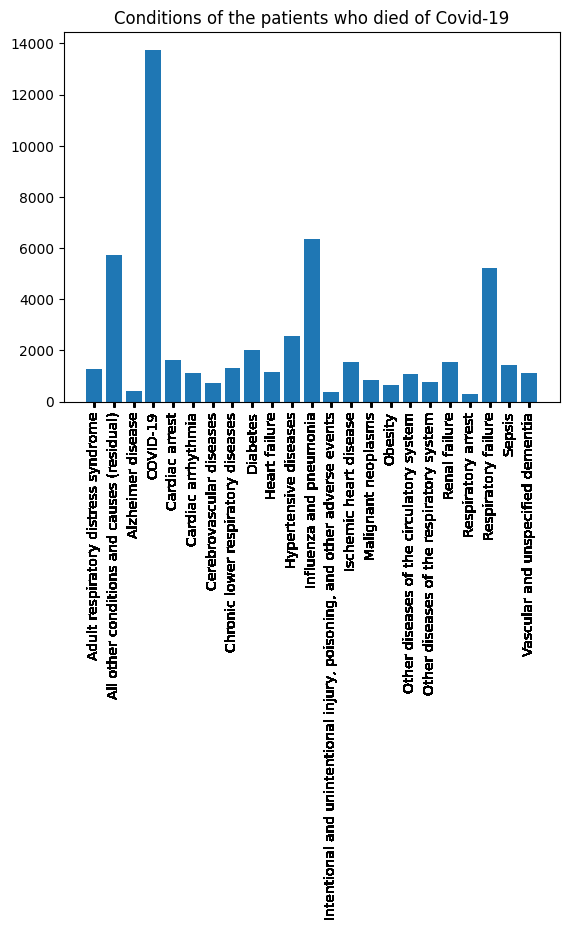

In [108]:
condition=df_group['Condition']
deaths=df_group['COVID-19 Deaths']
plt.bar(condition,deaths)
plt.xticks(condition, rotation='vertical')
plt.xlabel=('Condition')
plt.ylable=('Deaths')
plt.title('Conditions of the patients who died of Covid-19')
plt.show()

As per the bar plot, we can see that majority of the covid-19 deaths have happened solely on covid virus itself. But Influenza and Pneumonia have played significant impact on the deaths as well.

## The corelation between the age and the number of deaths in the US

In [85]:
df['Age Group'].dtype

dtype('O')

In [86]:
df['Age Group'].value_counts()

Age Group
0-24          62100
25-34         62100
35-44         62100
45-54         62100
55-64         62100
65-74         62100
75-84         62100
85+           62100
Not stated    62100
All Ages      62100
Name: count, dtype: int64

In [87]:
df['Age Group'].isin(['85+']).any()

True

In [88]:
df['Age Group'].isin(['Not stated']).any()

True

In [89]:
df['Age Group'].isin(['All Ages']).any()

True

In [90]:
df['Age Group'].replace('85+','85-120',inplace=True)

In [91]:
df['Age Group'].replace(['Not stated'],'200-300',inplace=True)

In [92]:
df['Age Group'].replace(['All Ages'],'200-300',inplace=True)

In [93]:
df['Age Group'].replace(['200-300'],np.nan,inplace=True)

In [94]:
df.dropna()

,Start Date,End Date,Group,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions
0,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0
1,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0
2,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0
3,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0
4,2020-01-01,2023-09-23,By Total,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0
...,...,...,...,...,...,...,...,...,...,...
620905,2023-05-01,2023-05-31,By Month,Puerto Rico,COVID-19,COVID-19,U071,85-120,34.0,34.0
620906,2023-06-01,2023-06-30,By Month,Puerto Rico,COVID-19,COVID-19,U071,85-120,57.0,57.0
620907,2023-07-01,2023-07-31,By Month,Puerto Rico,COVID-19,COVID-19,U071,85-120,41.0,41.0
620908,2023-08-01,2023-08-31,By Month,Puerto Rico,COVID-19,COVID-19,U071,85-120,33.0,33.0


In [95]:
df_age=df[['Age Group','Condition Group','COVID-19 Deaths']]

In [96]:
df_age.head()

,Age Group,Condition Group,COVID-19 Deaths
0,0-24,Respiratory diseases,1569.0
1,25-34,Respiratory diseases,5804.0
2,35-44,Respiratory diseases,15080.0
3,45-54,Respiratory diseases,37414.0
4,55-64,Respiratory diseases,82668.0


In [97]:
df_age[['Min Age','Max Age']]=df_age['Age Group'].str.split('-',expand=True)

<ipython-input-97-55a0f2317c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[['Min Age','Max Age']]=df_age['Age Group'].str.split('-',expand=True)
<ipython-input-97-55a0f2317c85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age[['Min Age','Max Age']]=df_age['Age Group'].str.split('-',expand=True)


In [98]:
df_age.head(10)

,Age Group,Condition Group,COVID-19 Deaths,Min Age,Max Age
0,0-24,Respiratory diseases,1569.0,0,24
1,25-34,Respiratory diseases,5804.0,25,34
2,35-44,Respiratory diseases,15080.0,35,44
3,45-54,Respiratory diseases,37414.0,45,54
4,55-64,Respiratory diseases,82668.0,55,64
5,65-74,Respiratory diseases,129005.0,65,74
6,75-84,Respiratory diseases,138503.0,75,84
7,85-120,Respiratory diseases,121119.0,85,120
8,NaN,Respiratory diseases,12.0,NaN,NaN
9,NaN,Respiratory diseases,531174.0,NaN,NaN


In [99]:
df_age['Min Age']=df_age['Min Age'].astype(float)
df_age['Max Age']=df_age['Max Age'].astype(float)
df_age[['Min Age','Max Age']].dtypes

<ipython-input-99-3c0ace5ba115>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Min Age']=df_age['Min Age'].astype(float)
<ipython-input-99-3c0ace5ba115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Max Age']=df_age['Max Age'].astype(float)


Min Age    float64
Max Age    float64
dtype: object

In [100]:
df_age['Avg_age']=(df_age['Min Age']+df_age['Max Age'])/2
df_age.head(10)

<ipython-input-100-6b6282f80f40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['Avg_age']=(df_age['Min Age']+df_age['Max Age'])/2


,Age Group,Condition Group,COVID-19 Deaths,Min Age,Max Age,Avg_age
0,0-24,Respiratory diseases,1569.0,0.0,24.0,12.0
1,25-34,Respiratory diseases,5804.0,25.0,34.0,29.5
2,35-44,Respiratory diseases,15080.0,35.0,44.0,39.5
3,45-54,Respiratory diseases,37414.0,45.0,54.0,49.5
4,55-64,Respiratory diseases,82668.0,55.0,64.0,59.5
5,65-74,Respiratory diseases,129005.0,65.0,74.0,69.5
6,75-84,Respiratory diseases,138503.0,75.0,84.0,79.5
7,85-120,Respiratory diseases,121119.0,85.0,120.0,102.5
8,NaN,Respiratory diseases,12.0,NaN,NaN,NaN
9,NaN,Respiratory diseases,531174.0,NaN,NaN,NaN


(0.0, 327320.7)

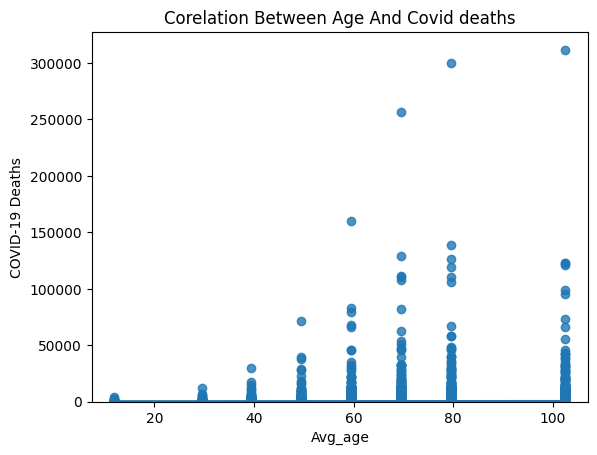

In [105]:
sns.regplot(x='Avg_age',y='COVID-19 Deaths',data=df_age)
plt.title("Corelation Between Age And Covid deaths")
plt.ylim(0,)

Even though it is said that the aged people were affected by Covid-19 , by looking at the regressio plot above, we can say that there is no linear corelation between the age and the deaths.

# I would go ahead and confirm the co-relation between age and deaths using pearson coeffiecient and pearson value.

In [111]:
pearson_coef,p_value=stats.pearsonr(df_age['Avg_age'],df_age['COVID-19 Deaths'])

In [113]:
print(f"Pearson Coefficient is:",pearson_coef)
print(f"Pearson Value is:",p_value)

Pearson Coefficient is: 0.018745848422104333
Pearson Value is: 2.166133231270221e-49


# Since Pearson Coefficient between the two variables is not close enough to +1 or -1 , but very close to 0 and P_value is too large, we can confirm that there is no corelation between the age and the deaths according to this data set.

In [114]:
df.to_csv("/content/drive/MyDrive/Data Sets/Project4/All_Covid_deaths.csv")
df_age.to_csv("/content/drive/MyDrive/Data Sets/Project4/Covid_deaths-By_age.csv")
df_group.to_csv("/content/drive/MyDrive/Data Sets/Project4/State_Age_Covid_Deaths.csv")